
## Решающие деревья


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

Делаем два двумерных датасета с помощью `make_moons`, `make_circles` 

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

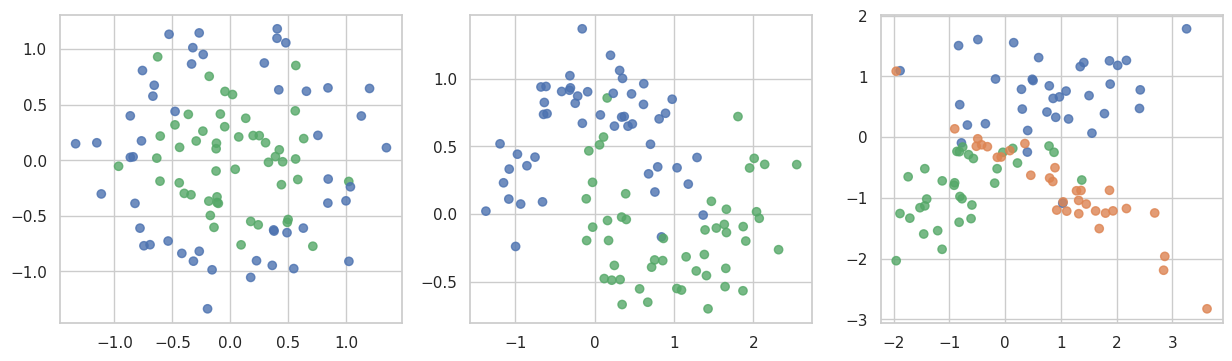

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

Обучаем решающее дерево с параметрами по умолчанию

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

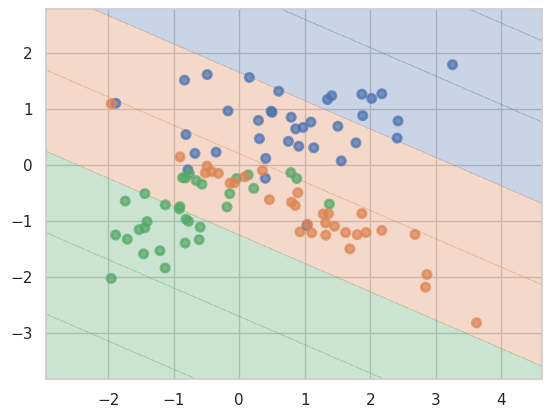

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
  Accuracy на обучении: 1.00
  Accuracy на тесте: 0.73

Dataset 2:
  Accuracy на обучении: 1.00
  Accuracy на тесте: 0.87

Dataset 3:
  Accuracy на обучении: 1.00
  Accuracy на тесте: 0.83



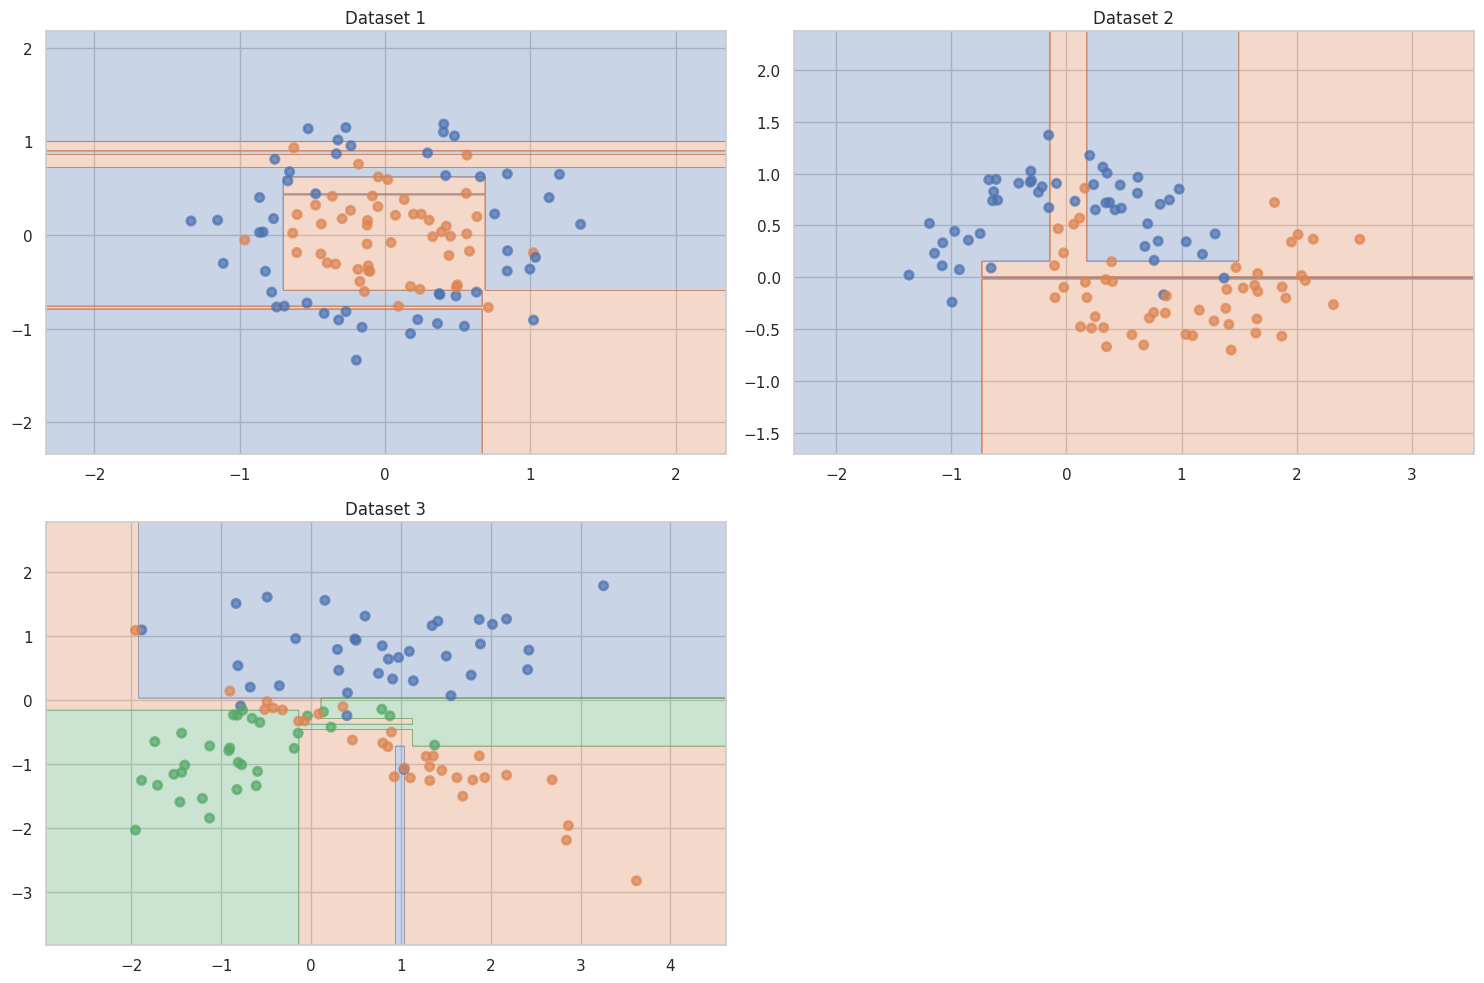

In [ ]:
from sklearn.model_selection import train_test_split


plt.figure(figsize=(15, 10))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)

    print(f"Dataset {i + 1}:\n"
          f"  Accuracy на обучении: {train_acc:.2f}\n"
          f"  Accuracy на тесте: {test_acc:.2f}\n")

    plt.subplot(2, 2, i + 1)
    plot_surface(clf, X, y)
    plt.title(f"Dataset {i + 1}")

plt.tight_layout()
plt.show()


Деревья сильно переобучились. Точность на обучающей выборке равна 1 (что указывает на полное запоминание данных), в то время как на тестовой выборке значительно ниже

Перебор параметров для регуляризации

max_depth=2, min_samples_leaf=1 => Train Accuracy: 0.83, Test Accuracy: 0.63


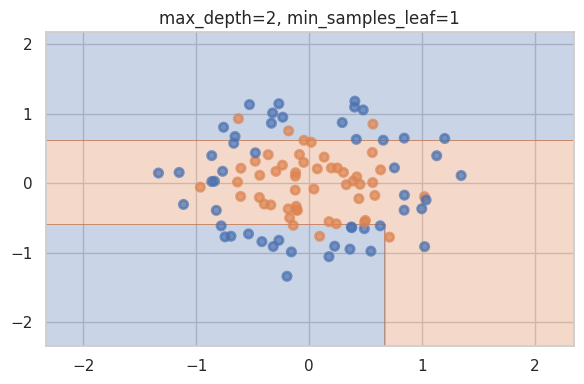

max_depth=2, min_samples_leaf=5 => Train Accuracy: 0.81, Test Accuracy: 0.67


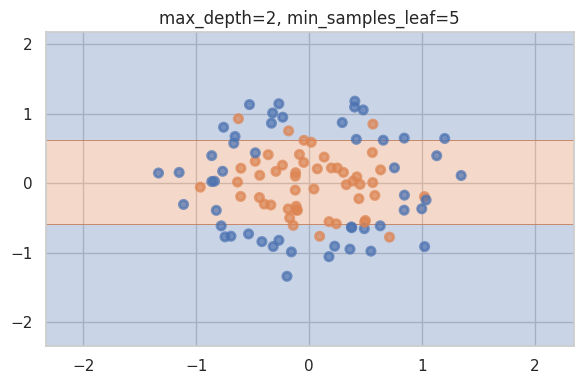

max_depth=2, min_samples_leaf=10 => Train Accuracy: 0.81, Test Accuracy: 0.67


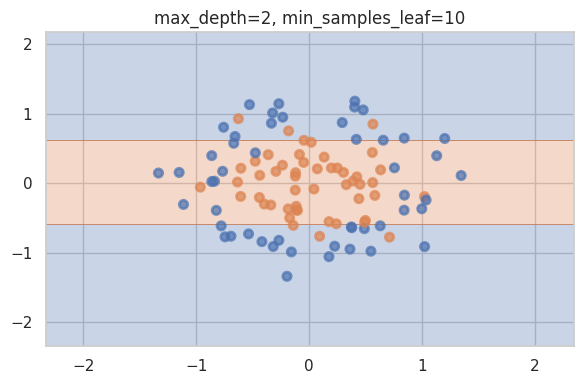

max_depth=5, min_samples_leaf=1 => Train Accuracy: 0.97, Test Accuracy: 0.77


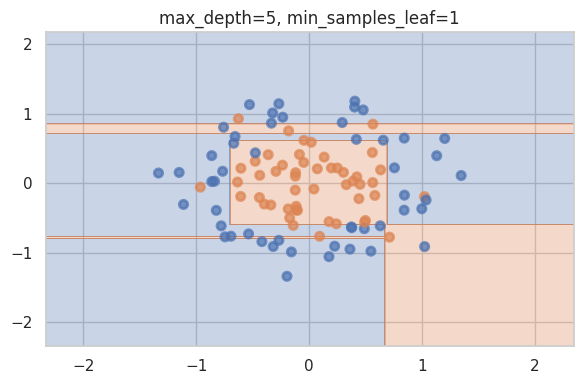

max_depth=5, min_samples_leaf=5 => Train Accuracy: 0.87, Test Accuracy: 0.90


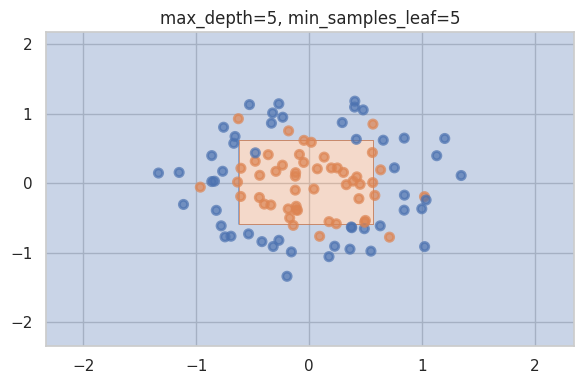

max_depth=5, min_samples_leaf=10 => Train Accuracy: 0.81, Test Accuracy: 0.77


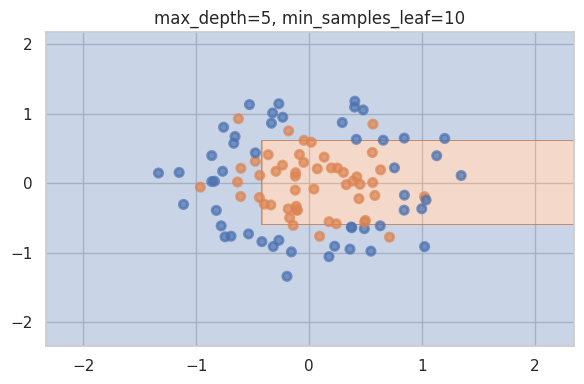

max_depth=10, min_samples_leaf=1 => Train Accuracy: 1.00, Test Accuracy: 0.73


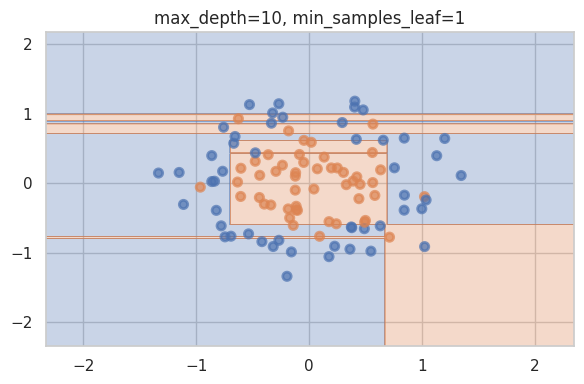

max_depth=10, min_samples_leaf=5 => Train Accuracy: 0.87, Test Accuracy: 0.90


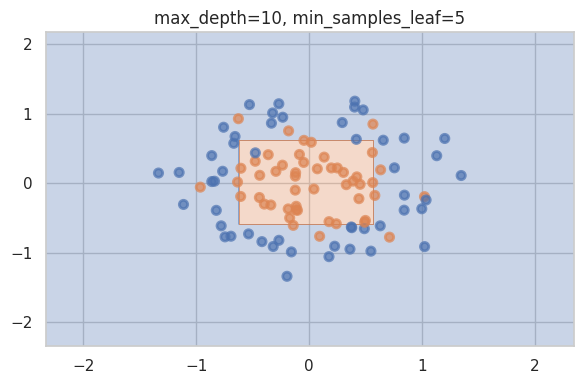

max_depth=10, min_samples_leaf=10 => Train Accuracy: 0.81, Test Accuracy: 0.77


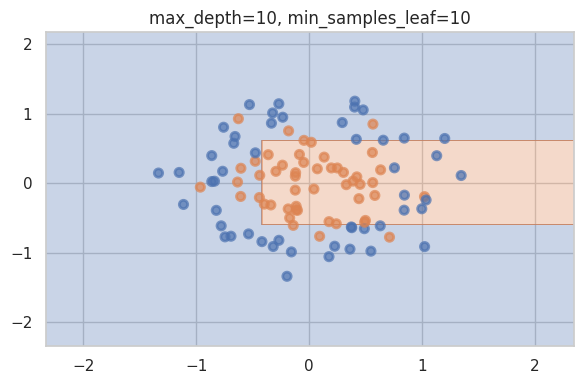

max_depth=2, min_samples_leaf=1 => Train Accuracy: 0.91, Test Accuracy: 0.93


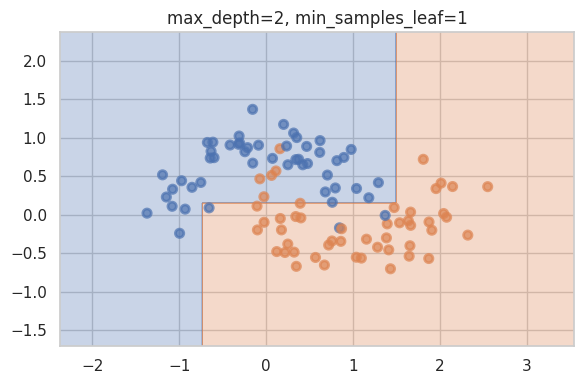

max_depth=2, min_samples_leaf=5 => Train Accuracy: 0.89, Test Accuracy: 0.80


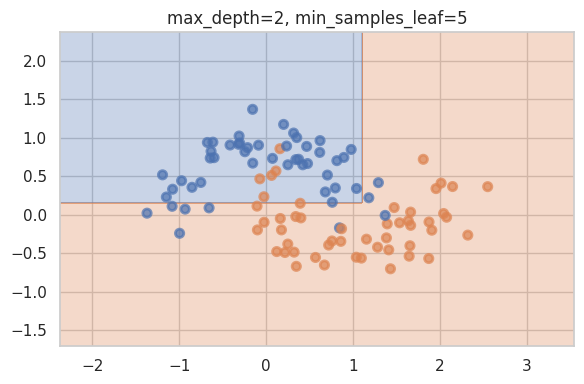

max_depth=2, min_samples_leaf=10 => Train Accuracy: 0.84, Test Accuracy: 0.80


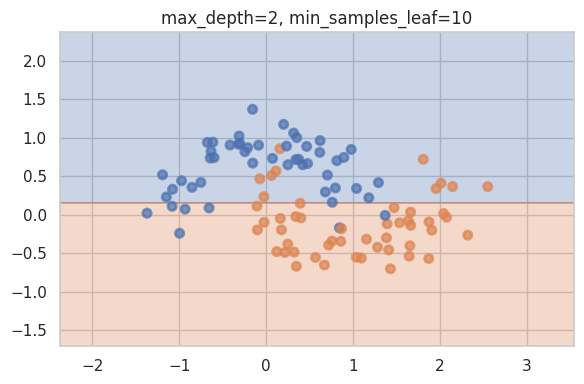

max_depth=5, min_samples_leaf=1 => Train Accuracy: 1.00, Test Accuracy: 0.87


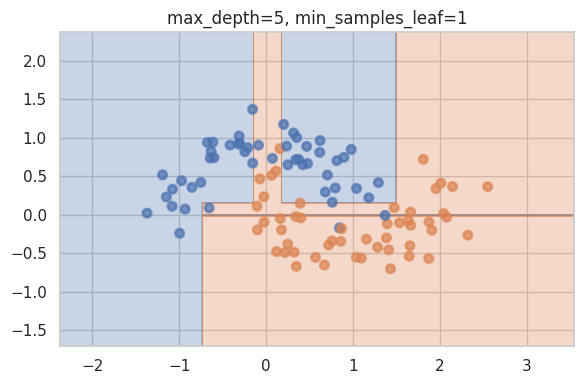

max_depth=5, min_samples_leaf=5 => Train Accuracy: 0.96, Test Accuracy: 0.73


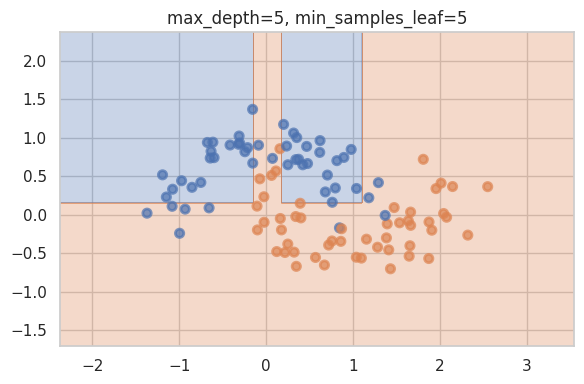

max_depth=5, min_samples_leaf=10 => Train Accuracy: 0.87, Test Accuracy: 0.77


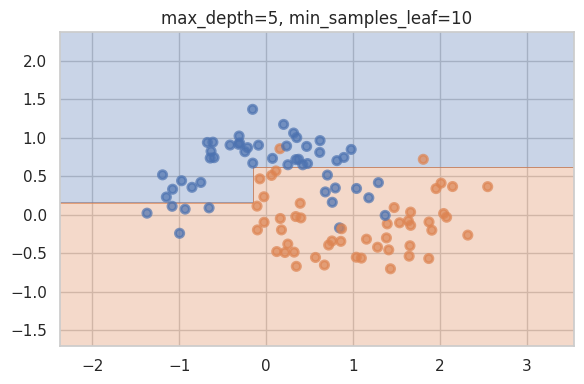

max_depth=10, min_samples_leaf=1 => Train Accuracy: 1.00, Test Accuracy: 0.87


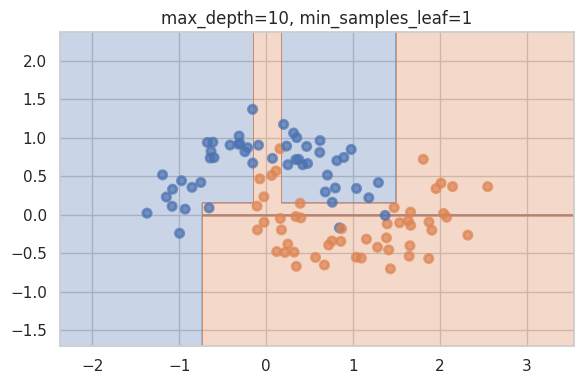

max_depth=10, min_samples_leaf=5 => Train Accuracy: 0.96, Test Accuracy: 0.73


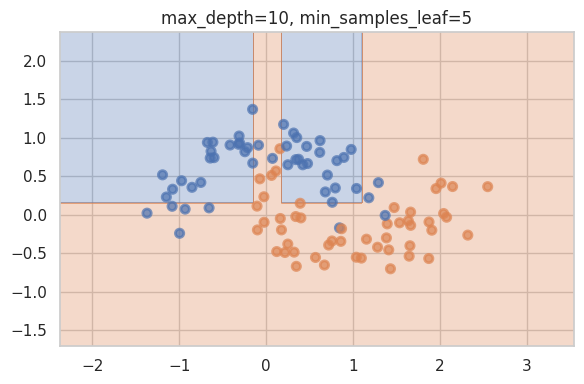

max_depth=10, min_samples_leaf=10 => Train Accuracy: 0.87, Test Accuracy: 0.77


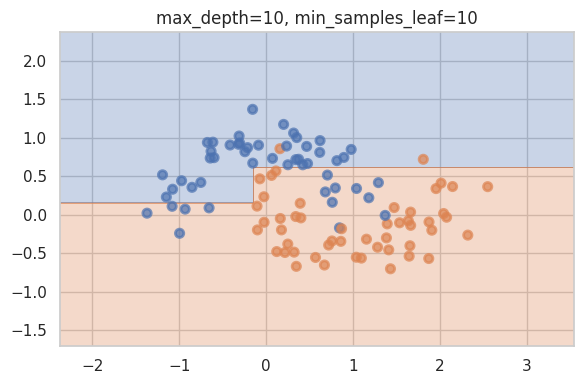

max_depth=2, min_samples_leaf=1 => Train Accuracy: 0.90, Test Accuracy: 0.77


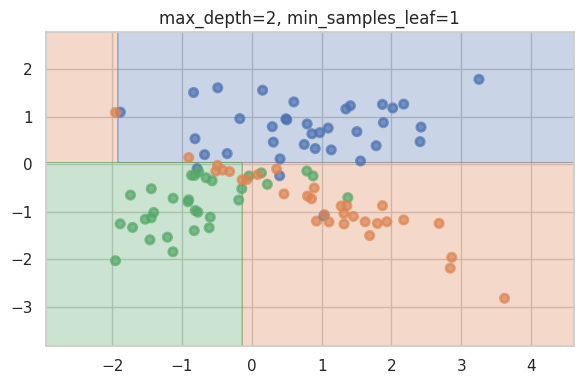

max_depth=2, min_samples_leaf=5 => Train Accuracy: 0.89, Test Accuracy: 0.77


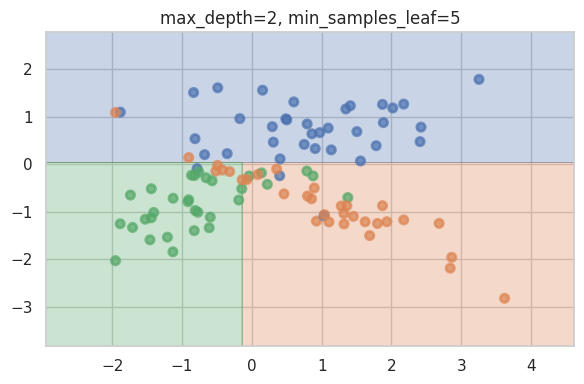

max_depth=2, min_samples_leaf=10 => Train Accuracy: 0.89, Test Accuracy: 0.77


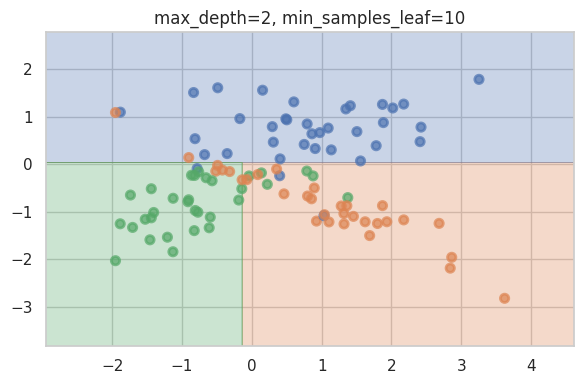

max_depth=5, min_samples_leaf=1 => Train Accuracy: 0.97, Test Accuracy: 0.80


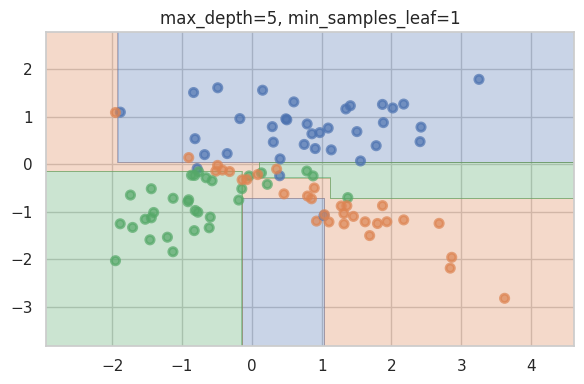

max_depth=5, min_samples_leaf=5 => Train Accuracy: 0.90, Test Accuracy: 0.70


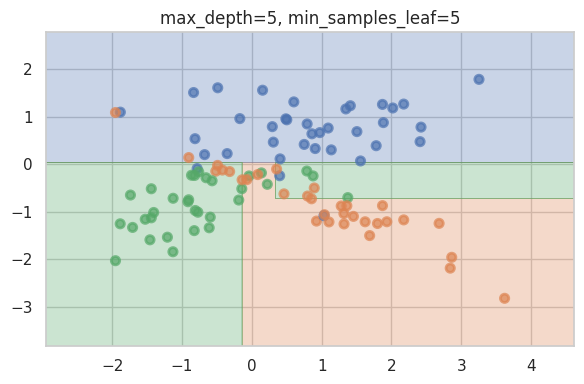

max_depth=5, min_samples_leaf=10 => Train Accuracy: 0.89, Test Accuracy: 0.77


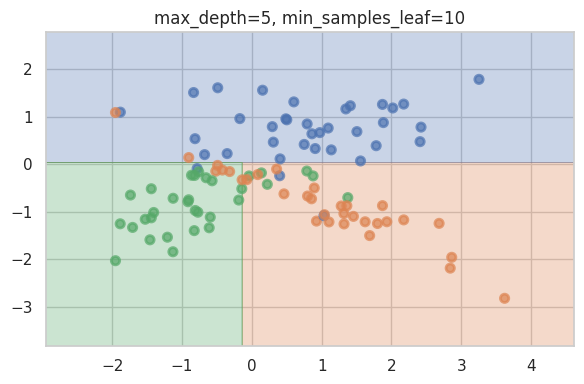

max_depth=10, min_samples_leaf=1 => Train Accuracy: 1.00, Test Accuracy: 0.83


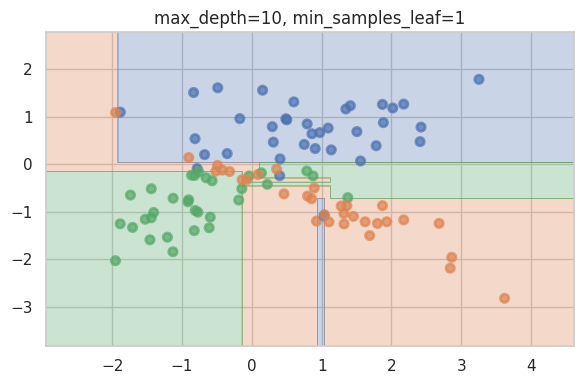

max_depth=10, min_samples_leaf=5 => Train Accuracy: 0.90, Test Accuracy: 0.70


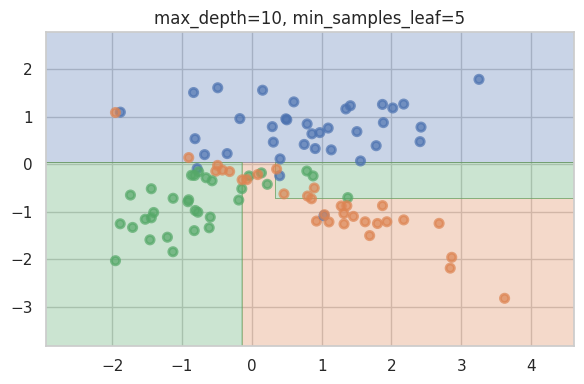

max_depth=10, min_samples_leaf=10 => Train Accuracy: 0.89, Test Accuracy: 0.77


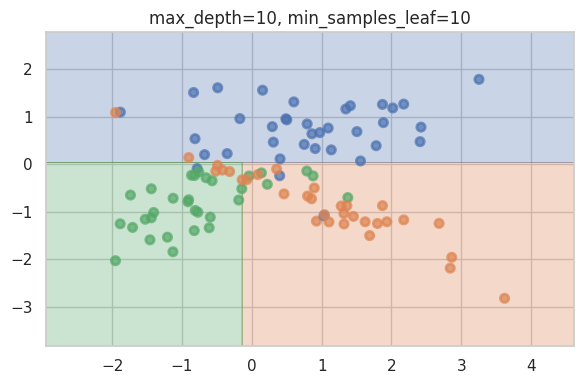

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth_values = [2, 5, 10]
min_samples_leaf_values = [1, 5, 10]

def evaluate_tree_with_params(X, y, max_depth, min_samples_leaf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)

    print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf} => "
          f"Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

    plt.figure(figsize=(6, 4))
    plot_surface(clf, X, y)
    plt.title(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
    plt.tight_layout()
    plt.show()

for i, (X, y) in enumerate(datasets):
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            evaluate_tree_with_params(X, y, max_depth, min_samples_leaf)


До определенного уровня улучшение параметров повышает обобщающую способность модели и ее качество на тестовой выборке, но после его достижения, качество начинает ухудшаться, модель перелбучается. Изменения параметров модели не одинаковы для разных датасетов, для сложных, с пересекающимися классами (третья), модель быстрее переобучается и результаты хуже.

# Решающие деревья своими руками

In [ ]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    s_ind = np.argsort(feature_vector)
    s_feat = feature_vector[s_ind]
    s_tar = target_vector[s_ind]

    uniq = np.unique(s_feat)
    if len(uniq) == 1:
        return np.array([]), np.array([]), None, None

    thresholds = (s_feat[:-1] + s_feat[1:]) / 2
    valid_thr = s_feat[:-1] != s_feat[1:]
    thresholds = thresholds[valid_thr]

    total_size = len(s_feat)
    total_1 = np.sum(s_tar == 1)
    total_0 = total_size - total_1

    cumsum_1 = np.cumsum(s_tar == 1)
    cumsum_total = np.arange(1, total_size + 1)

    l_sizes = cumsum_total[:-1][valid_thr]
    r_sizes = total_size - l_sizes

    l_p_1 = cumsum_1[:-1][valid_thr] / l_sizes
    l_p_0 = 1 - l_p_1
    r_p_1 = (total_1 - cumsum_1[:-1][valid_thr]) / r_sizes
    r_p_0 = 1 - r_p_1

    H_l = 1 - l_p_0**2 - l_p_1**2
    H_r = 1 - r_p_0**2 - r_p_1**2

    ginis = -(l_sizes / total_size) * H_l - (r_sizes / total_size) * H_r

    best_idx = np.argmax(ginis)
    gini_best = ginis[best_idx]
    threshold_best = thresholds[best_idx]

    return thresholds, ginis, threshold_best, gini_best



Данные - [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv). Таргет - последний столбец

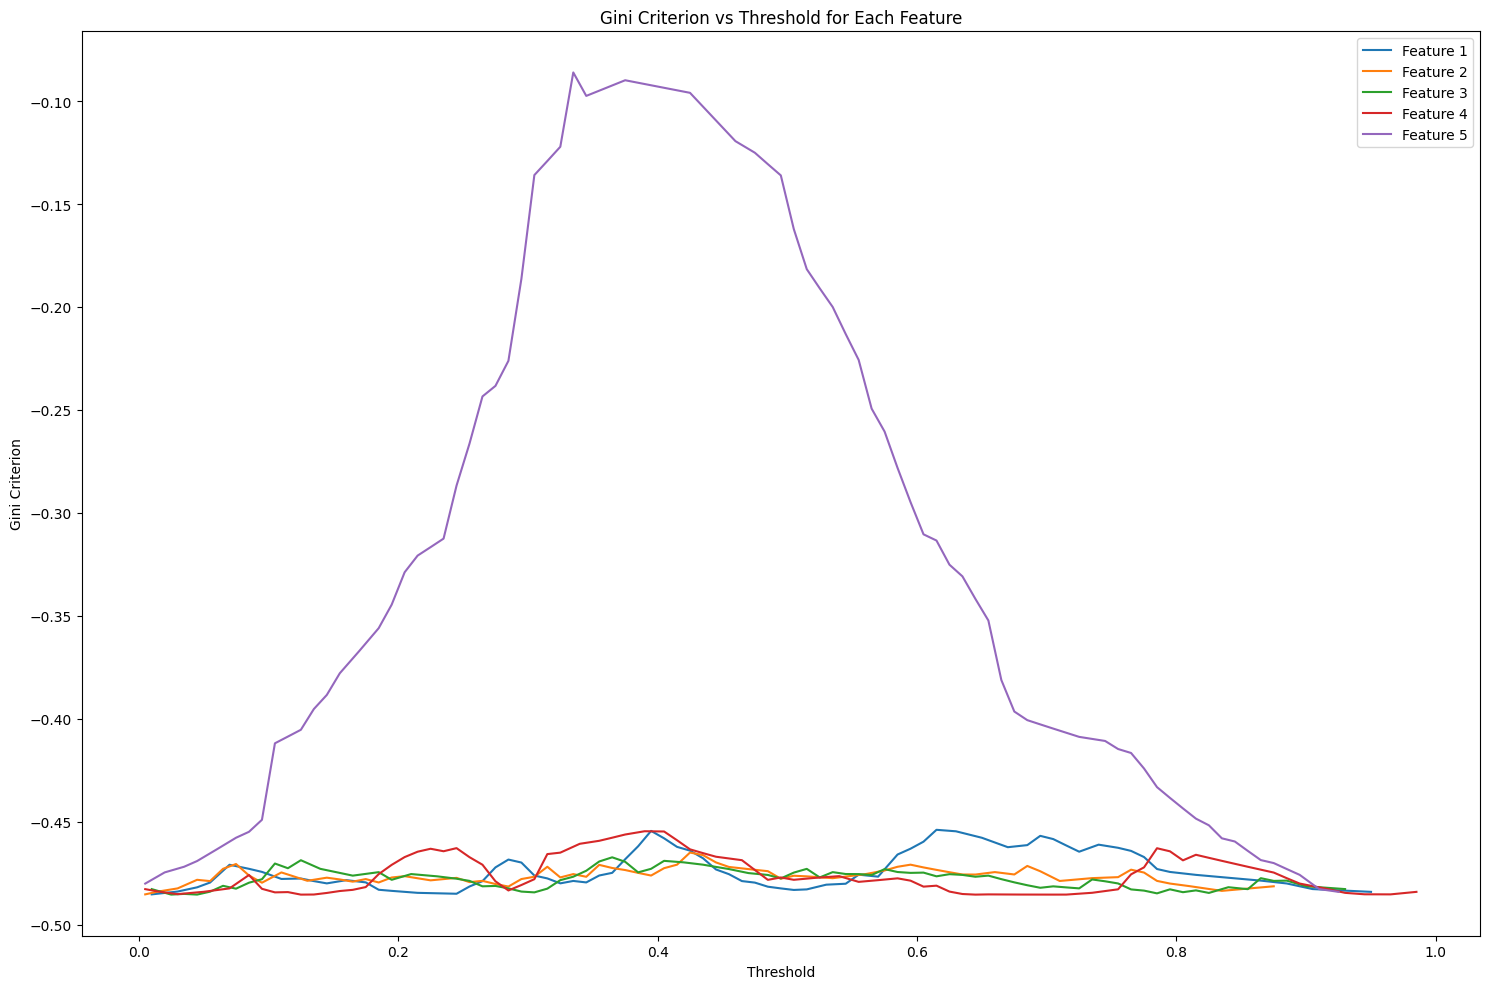

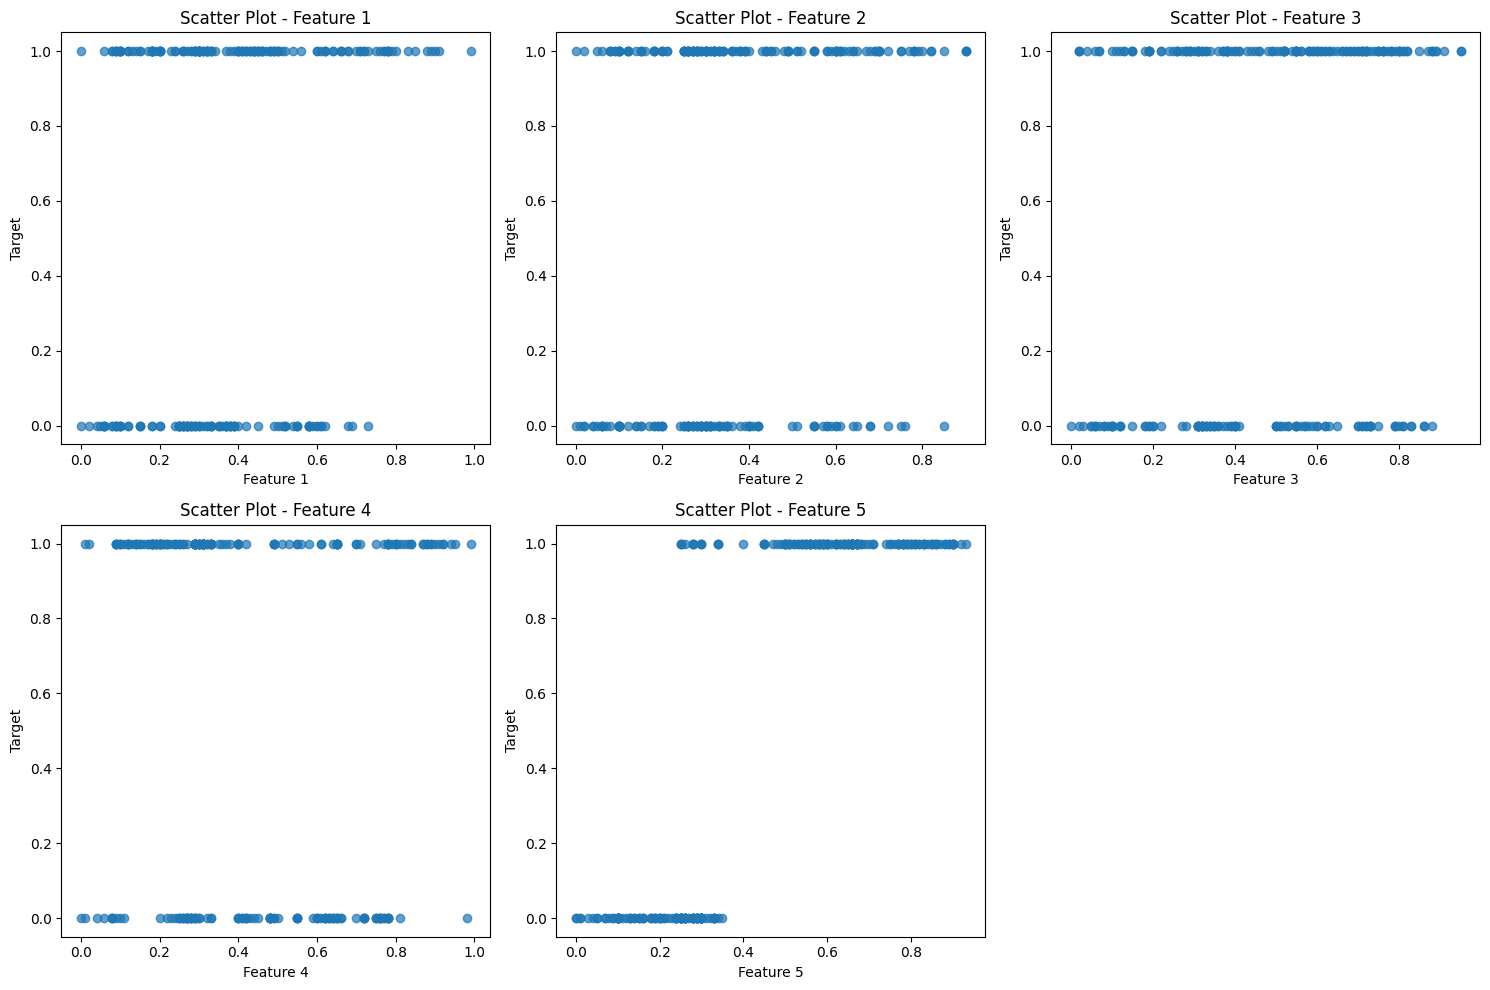

In [ ]:
import pandas as pd

data = pd.read_csv('students.csv')
features = data.iloc[:, :-1].values
target = data.iloc[:, -1].values

plt.figure(figsize=(15, 10))
for i in range(features.shape[1]):
    thresholds, ginis, tmp1, tmp2 = find_best_split(features[:, i], target)

    plt.plot(thresholds, ginis, label=f"Feature {i + 1}")

plt.xlabel('Threshold')
plt.ylabel('Gini Criterion')
plt.title('Gini Criterion vs Threshold for Each Feature')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i in range(features.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(features[:, i], target, alpha=0.7)
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Target')
    plt.title(f'Scatter Plot - Feature {i + 1}')

plt.tight_layout()
plt.show()


Feature 5 — лучший признак для разделения выборки, так как его кривая Джини имеет четкий пик, а на scatter-графике видно хорошее разделение классов.


Кривые для хороших признаков будут иметь отчетливый пик или спад в значении критерия Джини, указывающий на наличие оптимального порога.

Кривые для плохих признаков будут близки к горизонтальной линии, показывая, что значения критерия Джини практически не меняются при изменении порога.

In [ ]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    s_ind = np.argsort(feature_vector)
    s_feat = feature_vector[s_ind]
    s_tar = target_vector[s_ind]

    uniq = np.unique(s_feat)
    if len(uniq) == 1:
        return np.array([]), np.array([]), None, None

    thresholds = (s_feat[:-1] + s_feat[1:]) / 2
    valid_thr = s_feat[:-1] != s_feat[1:]
    thresholds = thresholds[valid_thr]

    total_size = len(s_feat)
    total_1 = np.sum(s_tar == 1)
    total_0 = total_size - total_1

    cumsum_1 = np.cumsum(s_tar == 1)
    cumsum_total = np.arange(1, total_size + 1)

    l_sizes = cumsum_total[:-1][valid_thr]
    r_sizes = total_size - l_sizes

    l_p_1 = cumsum_1[:-1][valid_thr] / l_sizes
    l_p_0 = 1 - l_p_1
    r_p_1 = (total_1 - cumsum_1[:-1][valid_thr]) / r_sizes
    r_p_0 = 1 - r_p_1

    H_l = 1 - l_p_0**2 - l_p_1**2
    H_r = 1 - r_p_0**2 - r_p_1**2

    ginis = -(l_sizes / total_size) * H_l - (r_sizes / total_size) * H_r

    best_idx = np.argmax(ginis)
    gini_best = ginis[best_idx]
    threshold_best = thresholds[best_idx]

    return thresholds, ginis, threshold_best, gini_best



class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] =  current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))

            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_split = node["feature_split"]
        if self._feature_types[feature_split] == "real":
            if x[feature_split] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if x[feature_split] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])


    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


class LinearRegressionTree():
    def __init__(self, feature_types, base_model_type=None, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        pass

Тест дерева на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Первый столбец — таргет

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/mushrooms.csv"
data = pd.read_csv(url)

label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ["categorical"] * X_train.shape[1]

tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


параметры max_depth, min_samples_split и min_samples_leaf

In [ ]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if self._max_depth is not None and depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))

            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None or np.sum(split) < self._min_samples_leaf or np.sum(~split) < self._min_samples_leaf:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_split = node["feature_split"]
        if self._feature_types[feature_split] == "real":
            if x[feature_split] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if x[feature_split] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        return np.array([self._predict_node(x, self._tree) for x in X])


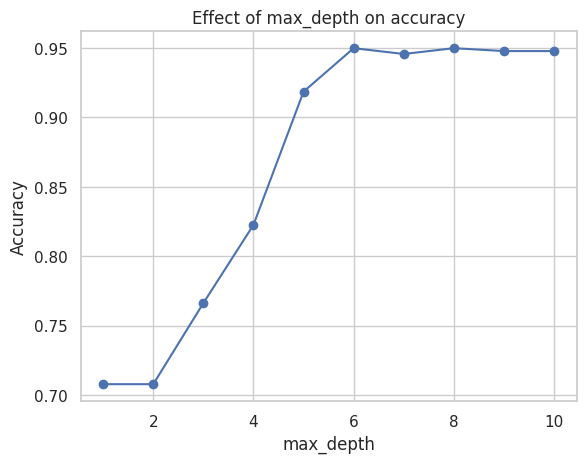

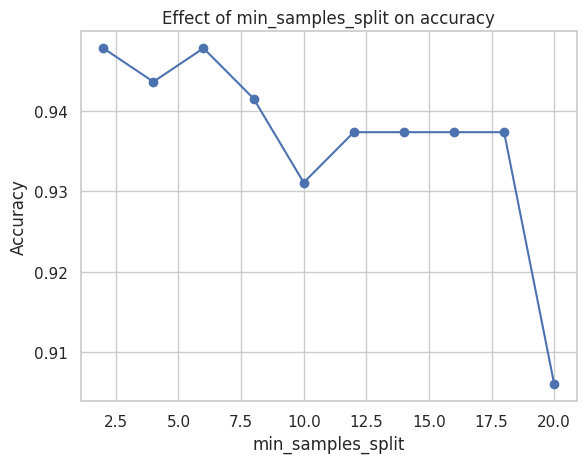

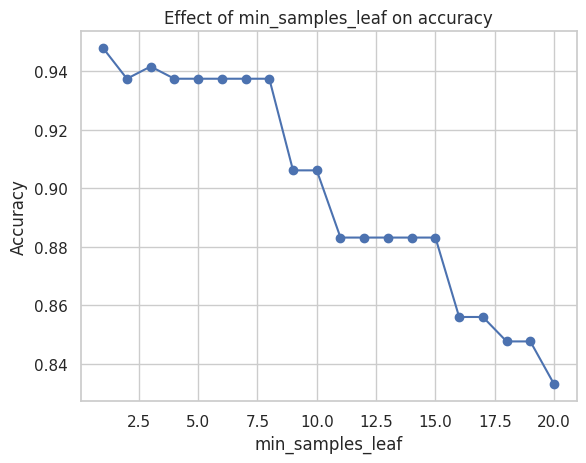

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
columns = ["top-left", "top-middle", "top-right",
           "middle-left", "middle-middle", "middle-right",
           "bottom-left", "bottom-middle", "bottom-right", "class"]
data = pd.read_csv(url, header=None, names=columns)

label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ["categorical"] * X_train.shape[1]

def plot_parameter_effect(param_name, param_values, fixed_params):
    accuracies = []
    for value in param_values:
        params = {**fixed_params, param_name: value}
        tree = DecisionTree(feature_types=feature_types, **params)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    plt.plot(param_values, accuracies, marker="o")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.title(f"Effect of {param_name} on accuracy")
    plt.grid(True)
    plt.show()

plot_parameter_effect("max_depth", range(1, 11), {"min_samples_split": 2, "min_samples_leaf": 1})
plot_parameter_effect("min_samples_split", range(2, 21, 2), {"max_depth": None, "min_samples_leaf": 1})
plot_parameter_effect("min_samples_leaf", range(1, 21), {"max_depth": None, "min_samples_split": 2})


`LinearRegressionTree`:


In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

class LinearRegressionTree(DecisionTree):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1, quantiles=10):
        super().__init__(feature_types, max_depth, min_samples_split, min_samples_leaf)
        self.quantiles = quantiles

    def find_best_split(self, feature_vector, target_vector):
        s_ind = np.argsort(feature_vector)
        s_feat = feature_vector[s_ind]
        s_tar = target_vector[s_ind]

        uniq = np.unique(s_feat)
        if len(uniq) == 1:
            return np.array([]), np.array([]), None, None

        thresholds = np.percentile(s_feat, np.linspace(0, 100, self.quantiles + 1)[1:-1])

        best_loss = float('inf')
        best_threshold = None
        best_split = None

        for threshold in thresholds:
            left_mask = s_feat < threshold
            right_mask = ~left_mask

            if np.sum(left_mask) < self._min_samples_leaf or np.sum(right_mask) < self._min_samples_leaf:
                continue

            model_left = LinearRegression().fit(s_feat[left_mask].reshape(-1, 1), s_tar[left_mask])
            model_right = LinearRegression().fit(s_feat[right_mask].reshape(-1, 1), s_tar[right_mask])

            pred_left = model_left.predict(s_feat[left_mask].reshape(-1, 1))
            pred_right = model_right.predict(s_feat[right_mask].reshape(-1, 1))

            loss_left = mean_absolute_error(s_tar[left_mask], pred_left)
            loss_right = mean_absolute_error(s_tar[right_mask], pred_right)

            total_loss = (len(left_mask) / len(s_feat)) * loss_left + (len(right_mask) / len(s_feat)) * loss_right

            if total_loss < best_loss:
                best_loss = total_loss
                best_threshold = threshold
                best_split = left_mask

        return best_threshold, best_loss, best_split

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if self._max_depth is not None and depth >= self._max_depth:
            node["type"] = "terminal"
            node["model"] = LinearRegression().fit(sub_X, sub_y)
            return

        if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["model"] = LinearRegression().fit(sub_X, sub_y)
            return

        best_threshold, best_loss, best_split = self.find_best_split(sub_X[:, 0], sub_y)

        if best_loss is None or best_loss == float('inf'):
            node["type"] = "terminal"
            node["model"] = LinearRegression().fit(sub_X, sub_y)
            return

        node["type"] = "nonterminal"
        node["threshold"] = best_threshold
        node["left_child"], node["right_child"] = {}, {}

        self._fit_node(sub_X[best_split], sub_y[best_split], node["left_child"], depth + 1)
        self._fit_node(sub_X[~best_split], sub_y[~best_split], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["model"].predict(x.reshape(1, -1))[0]

        if x[0] < node["threshold"]:
            return self._predict_node(x, node["left_child"])
        else:
            return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        return np.array([self._predict_node(x, self._tree) for x in X])


подбор гиперпараметров


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 5, 10, 20, 30, 50],
    'quantiles': [5, 10, 15, 20, 25]
}

def tune_parameter(param_name, param_values, fixed_params):
    best_mae = float('inf')
    best_param = None

    for value in param_values:
        params = {**fixed_params, param_name: value}
        model = LinearRegressionTree(
            feature_types=['real'] * X_train.shape[1],
            **params
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)

        print(f"Testing {param_name} = {value} -> MAE: {mae:.4f}")

        if mae < best_mae:
            best_mae = mae
            best_param = value

    return best_param, best_mae

fixed_params = {'min_samples_split': 2, 'min_samples_leaf': 1, 'quantiles': 10}
best_max_depth, best_mae = tune_parameter('max_depth', param_grid['max_depth'], fixed_params)
print(f"Best max_depth: {best_max_depth} -> MAE: {best_mae:.4f}")

fixed_params = {'max_depth': best_max_depth, 'min_samples_leaf': 1, 'quantiles': 10}
best_min_samples_split, best_mae = tune_parameter('min_samples_split', param_grid['min_samples_split'], fixed_params)
print(f"Best min_samples_split: {best_min_samples_split} -> MAE: {best_mae:.4f}")

fixed_params = {'max_depth': best_max_depth, 'min_samples_split': best_min_samples_split, 'quantiles': 10}
best_min_samples_leaf, best_mae = tune_parameter('min_samples_leaf', param_grid['min_samples_leaf'], fixed_params)
print(f"Best min_samples_leaf: {best_min_samples_leaf} -> MAE: {best_mae:.4f}")

fixed_params = {'max_depth': best_max_depth, 'min_samples_split': best_min_samples_split, 'min_samples_leaf': best_min_samples_leaf}
best_quantiles, best_mae = tune_parameter('quantiles', param_grid['quantiles'], fixed_params)
print(f"Best quantiles: {best_quantiles} -> MAE: {best_mae:.4f}")

best_model = LinearRegressionTree(
    feature_types=['real'] * X_train.shape[1],
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    quantiles=best_quantiles
)
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"Test MAE: {test_mae:.4f}")


Testing max_depth = 5 -> MAE: 0.5984
Testing max_depth = 10 -> MAE: 0.5583
Testing max_depth = 15 -> MAE: 0.5685
Best max_depth: 10 -> MAE: 0.5583
Testing min_samples_split = 2 -> MAE: 0.5583
Testing min_samples_split = 5 -> MAE: 0.5621
Testing min_samples_split = 10 -> MAE: 0.6649
Testing min_samples_split = 15 -> MAE: 0.6367
Testing min_samples_split = 20 -> MAE: 0.6114
Testing min_samples_split = 25 -> MAE: 0.6114
Testing min_samples_split = 30 -> MAE: 0.6114
Best min_samples_split: 2 -> MAE: 0.5583
Testing min_samples_leaf = 1 -> MAE: 0.5583
Testing min_samples_leaf = 2 -> MAE: 0.7931
Testing min_samples_leaf = 5 -> MAE: 0.7037
Testing min_samples_leaf = 10 -> MAE: 0.5828
Testing min_samples_leaf = 20 -> MAE: 0.5613
Testing min_samples_leaf = 30 -> MAE: 0.5613
Testing min_samples_leaf = 50 -> MAE: 0.5404
Best min_samples_leaf: 50 -> MAE: 0.5404
Testing quantiles = 5 -> MAE: 0.5183
Testing quantiles = 10 -> MAE: 0.5404
Testing quantiles = 15 -> MAE: 0.5398
Testing quantiles = 20 -> 

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

param_grid_sklearn = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 5, 10, 20, 30, 50],
}


def tune_parameter_sklearn(param_name, param_values, fixed_params):
    best_mae = float('inf')
    best_param = None

    for value in param_values:
        params = {**fixed_params, param_name: value}
        model = DecisionTreeRegressor(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)

        print(f"Testing {param_name} = {value} -> MAE: {mae:.4f}")

        if mae < best_mae:
            best_mae = mae
            best_param = value

    return best_param, best_mae

fixed_params_sklearn = {'min_samples_split': 2, 'min_samples_leaf': 1}
best_max_depth_sklearn, best_mae_sklearn = tune_parameter_sklearn('max_depth', param_grid_sklearn['max_depth'], fixed_params_sklearn)
print(f"Best max_depth (sklearn tree): {best_max_depth_sklearn} -> MAE: {best_mae_sklearn:.4f}")

fixed_params_sklearn = {'max_depth': best_max_depth_sklearn, 'min_samples_leaf': 1}
best_min_samples_split_sklearn, best_mae_sklearn = tune_parameter_sklearn('min_samples_split', param_grid_sklearn['min_samples_split'], fixed_params_sklearn)
print(f"Best min_samples_split (sklearn tree): {best_min_samples_split_sklearn} -> MAE: {best_mae_sklearn:.4f}")

fixed_params_sklearn = {'max_depth': best_max_depth_sklearn, 'min_samples_split': best_min_samples_split_sklearn}
best_min_samples_leaf_sklearn, best_mae_sklearn = tune_parameter_sklearn('min_samples_leaf', param_grid_sklearn['min_samples_leaf'], fixed_params_sklearn)
print(f"Best min_samples_leaf (sklearn tree): {best_min_samples_leaf_sklearn} -> MAE: {best_mae_sklearn:.4f}")

best_model_sklearn = DecisionTreeRegressor(
    max_depth=best_max_depth_sklearn,
    min_samples_split=best_min_samples_split_sklearn,
    min_samples_leaf=best_min_samples_leaf_sklearn
)
best_model_sklearn.fit(X_train, y_train)
y_pred_test_sklearn = best_model_sklearn.predict(X_test)
test_mae_sklearn = mean_absolute_error(y_test, y_pred_test_sklearn)
print(f"Test MAE (sklearn tree): {test_mae_sklearn:.4f}")

Testing max_depth = 5 -> MAE: 0.5266
Testing max_depth = 10 -> MAE: 0.4461
Testing max_depth = 15 -> MAE: 0.4386
Best max_depth (sklearn tree): 15 -> MAE: 0.4386
Testing min_samples_split = 2 -> MAE: 0.4411
Testing min_samples_split = 5 -> MAE: 0.4349
Testing min_samples_split = 10 -> MAE: 0.4243
Testing min_samples_split = 15 -> MAE: 0.4185
Testing min_samples_split = 20 -> MAE: 0.4163
Testing min_samples_split = 25 -> MAE: 0.4080
Testing min_samples_split = 30 -> MAE: 0.4080
Best min_samples_split (sklearn tree): 25 -> MAE: 0.4080
Testing min_samples_leaf = 1 -> MAE: 0.4105
Testing min_samples_leaf = 2 -> MAE: 0.4067
Testing min_samples_leaf = 5 -> MAE: 0.4087
Testing min_samples_leaf = 10 -> MAE: 0.4035
Testing min_samples_leaf = 20 -> MAE: 0.4012
Testing min_samples_leaf = 30 -> MAE: 0.4138
Testing min_samples_leaf = 50 -> MAE: 0.4288
Best min_samples_leaf (sklearn tree): 20 -> MAE: 0.4012
Test MAE (sklearn tree): 0.4069


Стандартное дерево имеет меньшую ошибку


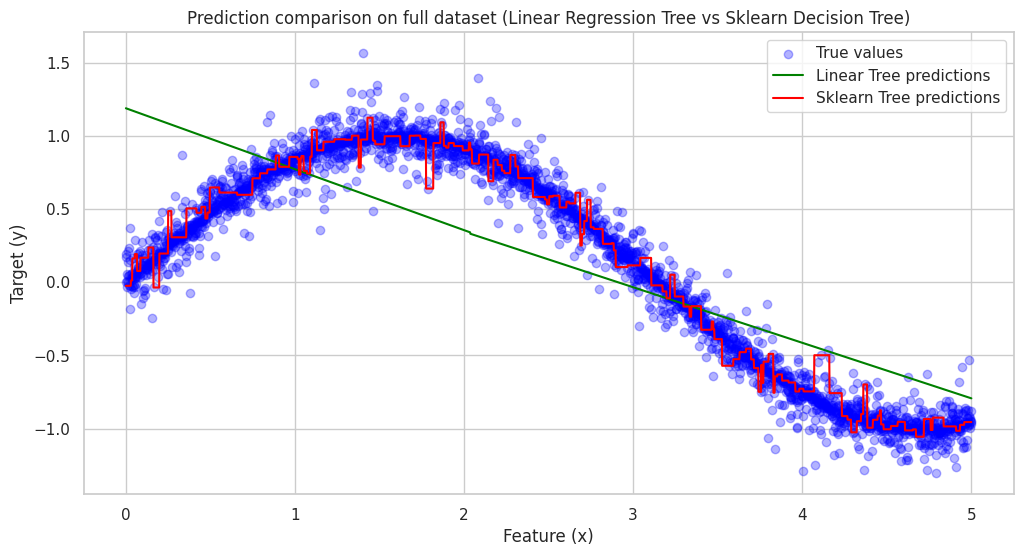

In [36]:
feature_types = ['real'] * x_train.shape[1]
linear_tree = LinearRegressionTree(feature_types=feature_types, max_depth=10, min_samples_split=2, min_samples_leaf=50, quantiles=5)
linear_tree.fit(x_train, y_train)

y_pred_full_tree = linear_tree.predict(x)

sklearn_tree = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)
sklearn_tree.fit(x_train, y_train)

y_pred_full_sklearn = sklearn_tree.predict(x)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='True values', color='blue', alpha=0.3)
plt.plot(x, y_pred_full_tree, label='Linear Tree predictions', color='green')
plt.plot(x, y_pred_full_sklearn, label='Sklearn Tree predictions', color='red')
plt.legend()
plt.title('Prediction comparison on full dataset (Linear Regression Tree vs Sklearn Decision Tree)')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.show()



Преимущества:

Хорошая способность улавливать глобальный тренд. Реализованное дерево сглаживает предсказания и лучше описывает общую тенденцию данных по сравнению со стандартным деревом.

Учет линейных зависимостей в узлах, благодаря которым реализованное дерево показывает более обоснованные предсказания в диапазонах, где стандартное дерево строит кусочно-постоянные функции.

Меньшая переобучаемость, дерево избегает излишней подгонки к шуму данных, что делает его более устойчивым.

Недостатки:

Реализованное дерево хуже адаптируется к мелким вариациям в данных, уступая стандартному дереву в точности.

Эффективность реализованного дерева сильно зависит от подбора параметров, таких как max_depth или min_samples_leaf.